In [1]:
%matplotlib inline 

import Quandl
import calendar
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import statsmodels.tsa.stattools as stats
from helpers import correlation, procces_stocks, data_manipulation, download_quandl_data

import sys
from os import listdir
from os.path import isfile, join

In [55]:
GOLD = data_manipulation.read_csv_data('/Users/Pablo/Desktop/TFM/Data/GOLD_new.csv')
SILVER = data_manipulation.read_csv_data('/Users/Pablo/Desktop/TFM/Data/SILVER_new.csv')
PLAT = data_manipulation.read_csv_data('/Users/Pablo/Desktop/TFM/Data/PLAT_new.csv')
INDEX_DJIA = data_manipulation.read_csv_data('/Users/Pablo/Desktop/TFM/Data/INDEX_DJIA_new.csv')
INDEX_HSI = data_manipulation.read_csv_data('/Users/Pablo/Desktop/TFM/Data/INDEX_HSI_new.csv')
INDEX_IBEX = data_manipulation.read_csv_data('/Users/Pablo/Desktop/TFM/Data/INDEX_IBEX_new.csv')
INDEX_N225 = data_manipulation.read_csv_data('/Users/Pablo/Desktop/TFM/Data/INDEX_N225_new.csv')
INDEX_SP500 = data_manipulation.read_csv_data('/Users/Pablo/Desktop/TFM/Data/INDEX_SP500_new.csv')

In [56]:
GOLD = procces_stocks.order_dataframe(GOLD)
SILVER = procces_stocks.order_dataframe(SILVER)
PLAT = procces_stocks.order_dataframe(PLAT)

In [65]:
min_date = '1993-04-08'
GOLD_new = procces_stocks.select_rows_by_actual_date(GOLD, min_date)
SILVER_new = procces_stocks.select_rows_by_actual_date(SILVER, min_date)
PLAT_new = procces_stocks.select_rows_by_actual_date(PLAT, min_date)

In [66]:
cols = ['Date', 'USD (AM)', 'USD (PM)']
GOLD_new = procces_stocks.align_date_in_dataframe(INDEX_DJIA, GOLD_new, cols)
cols = ['Date', 'USD']
SILVER_new = procces_stocks.align_date_in_dataframe(INDEX_DJIA, SILVER_new, cols)
cols = ['Date', 'USD AM', 'USD PM']
PLAT_new = procces_stocks.align_date_in_dataframe(INDEX_DJIA, PLAT_new, cols)

In [67]:
cols = ['USD (AM)', 'USD (PM)']
GOLD_new = procces_stocks.fill_gaps_with_interpolation(GOLD, GOLD_new, cols, ['linear'], False)
cols = ['USD']
SILVER_new = procces_stocks.fill_gaps_with_interpolation(SILVER, SILVER_new, cols, ['linear'], False)
cols = ['USD AM', 'USD PM']
PLAT_new = procces_stocks.fill_gaps_with_interpolation(PLAT, PLAT_new, cols, ['linear'], False)

Interpolating column USD (AM)...
Interpolating column USD (PM)...
Interpolating column USD...
Interpolating column USD AM...
Interpolating column USD PM...


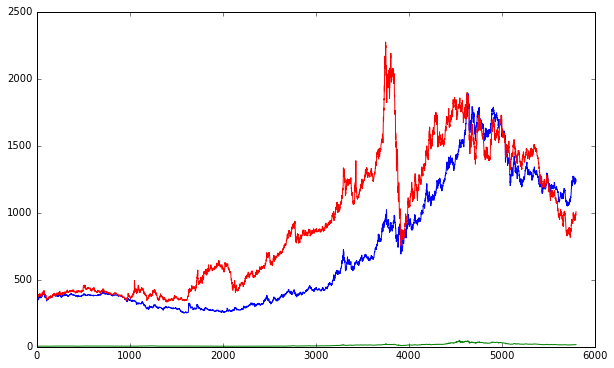

In [73]:
fig_size = [10, 6]
plt.rcParams["figure.figsize"] = fig_size
plt.plot(GOLD_new['USD (AM)'], 'b')
plt.plot(SILVER_new['USD'], 'g')
plt.plot(PLAT_new['USD AM'], 'r')
plt.show()

In [72]:
#data_manipulation.write_csv_data(GOLD_new, '/Users/Pablo/Desktop/TFM/Data/GOLD_new.csv')
#data_manipulation.write_csv_data(SILVER_new, '/Users/Pablo/Desktop/TFM/Data/SILVER_new.csv')
#data_manipulation.write_csv_data(PLAT_new, '/Users/Pablo/Desktop/TFM/Data/PLAT_new.csv')
#write_csv_data(INDEX_DJIA_new, '/Users/Pablo/Desktop/TFM/Data/INDEX_DJIA_new.csv')
#write_csv_data(INDEX_SP500_new, '/Users/Pablo/Desktop/TFM/Data/INDEX_SP500_new.csv')
#write_csv_data(INDEX_HSI_new, '/Users/Pablo/Desktop/TFM/Data/INDEX_HSI_new.csv')
#write_csv_data(INDEX_IBEX_new, '/Users/Pablo/Desktop/TFM/Data/INDEX_IBEX_new.csv')
#write_csv_data(INDEX_N225_new, '/Users/Pablo/Desktop/TFM/Data/INDEX_N225_new.csv')